<a href="https://colab.research.google.com/github/Yalla-Krishnaveni/2216123_AIML_Bootcamp/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from tensorflow.keras.layers import Input,Dense,Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [30]:
#resize all images to this
IMAGE_SIZE=[224,224]

train_path='/content/drive/MyDrive/Dataset/Dataset/Train'
valid_path='/content/drive/MyDrive/Dataset/Dataset/Test'

In [31]:
#import vgg 19 lib as shown and add preprocessing layer to front of VGG
#here we use imag
vgg19=VGG19(input_shape=IMAGE_SIZE + [3],weights='imagenet',include_top=False)


In [32]:
#dont train existing weights bcoz our input features differ
for layer in vgg19.layers:
  layer.trainable=False

In [33]:
#useful for getting no of output classes
folders=glob('/content/drive/MyDrive/Dataset/Dataset/Train/*')

In [34]:
folders

['/content/drive/MyDrive/Dataset/Dataset/Train/Parasite',
 '/content/drive/MyDrive/Dataset/Dataset/Train/Uninfected']

In [35]:
#our layers-you can add more if u want-till flatten layer of existing vgg19
x=Flatten()(vgg19.output)

In [36]:
prediction=Dense(len(folders),activation='softmax')(x)

#create a model object
model=Model(inputs=vgg19.input,outputs=prediction)

In [37]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten,Conv2D
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [38]:
#tell model what cost and optimization model to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [39]:
#tell the model what cost and optimization method to use
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [40]:
#make sure u providesame target size as initiated for img size
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/Train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 416 images belonging to 2 classes.


In [41]:
training_set

In [42]:
#make sure u providesame target size as initiated for img size
test_set=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/Test',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 134 images belonging to 2 classes.


In [43]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",patience=5,verbose=True)

In [44]:
r=model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=4,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
    callbacks=[early_stop],verbose=True 
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/4
13/13 [==============================] - 394s 31s/step - loss: 1.6603 - accuracy: 0.4928 - val_loss: 1.3107 - val_accuracy: 0.3507
Epoch 2/4
13/13 [==============================] - 372s 29s/step - loss: 0.5630 - accuracy: 0.7019 - val_loss: 0.5628 - val_accuracy: 0.7239
Epoch 3/4
13/13 [==============================] - 348s 27s/step - loss: 0.4409 - accuracy: 0.8005 - val_loss: 0.6757 - val_accuracy: 0.6269
Epoch 4/4
13/13 [==============================] - 348s 27s/step - loss: 0.3661 - accuracy: 0.8462 - val_loss: 0.4059 - val_accuracy: 0.7836


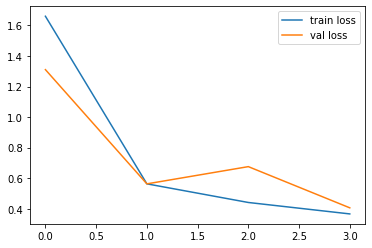

In [47]:
#Plot the loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
#plt.savegig('LossVal_loss')

#plot the accuracy
#plt.plot(r.history['accuracy'],label=)